In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
column_name= ["MPG", "Cylinders", "Displacement", "Horsepower","Weight","Acceleration","Model Year","Origin"]

In [3]:
data= pd.read_csv("auto-mpg.data", names= column_name, na_values="?", comment="\t", sep=" ", skipinitialspace= True)
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
data = data.rename(columns= {"MPG":"target"})
data

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
data.shape

(398, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
describe= data.describe()
describe

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


mean median'dan büyük ise burada normal dağılım yoktur pozitif skewness vardır.

### Handling Missing Values

In [8]:
data.isna().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

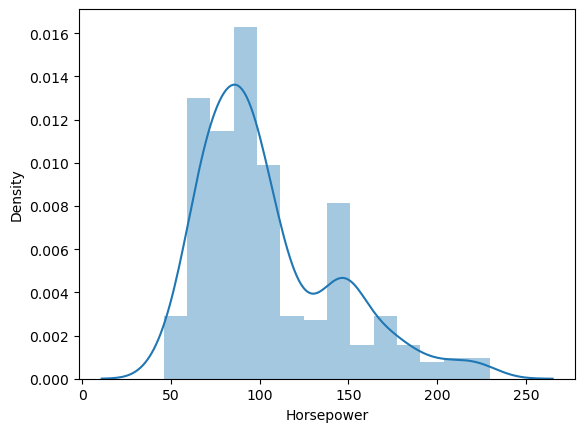

In [9]:
sns.distplot(data.Horsepower)

In [10]:
data["Horsepower"]= data["Horsepower"].fillna(data["Horsepower"].mean())

In [11]:
data.isna().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

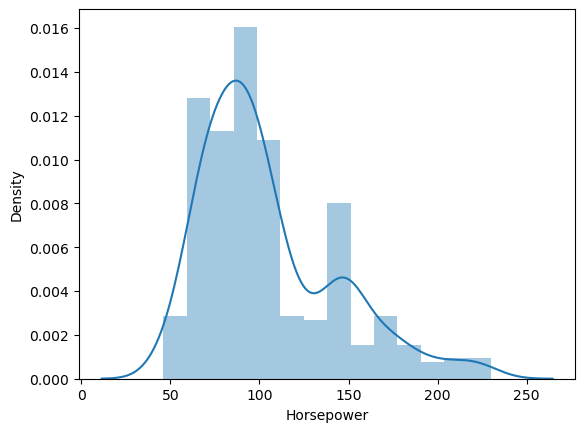

In [12]:
sns.distplot(data.Horsepower)

### Exploratory Data Analysis

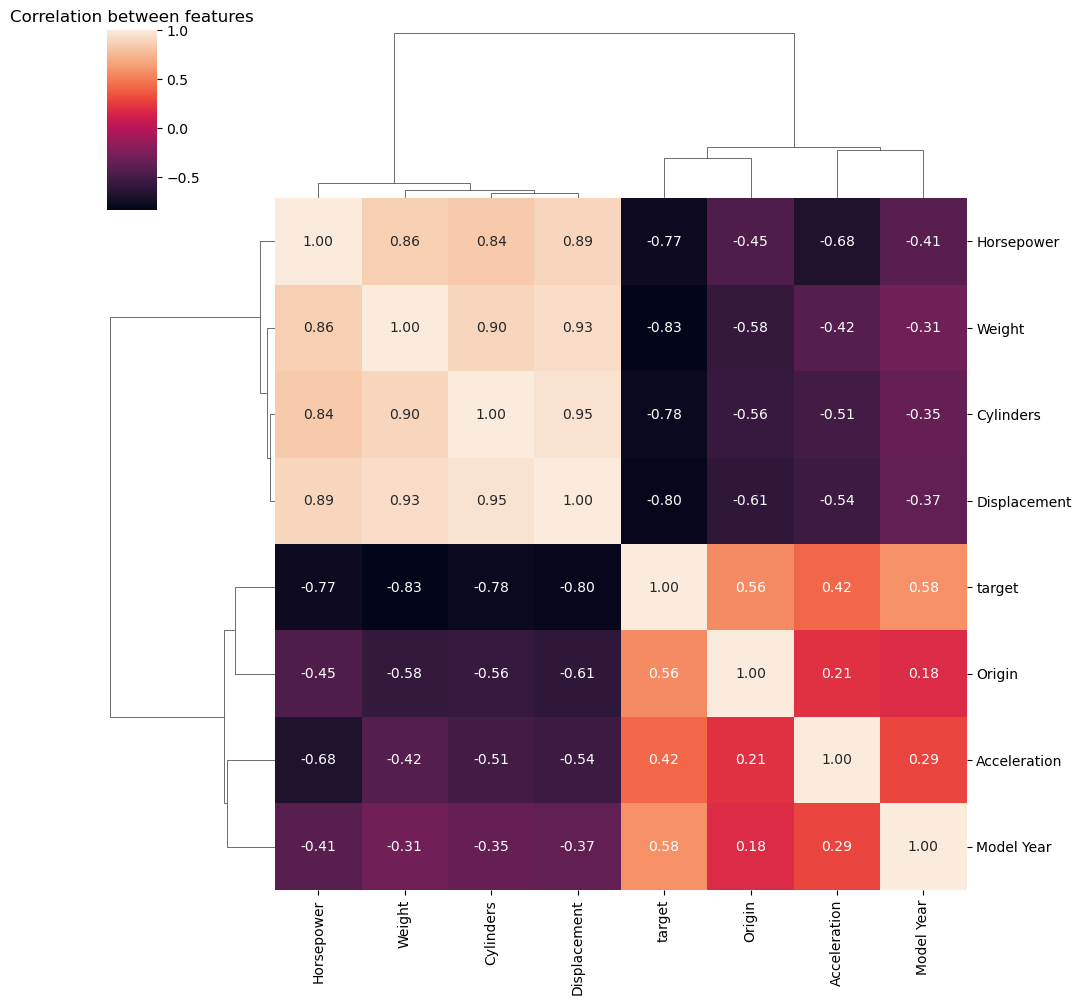

In [13]:
corr_matrix= data.corr()
sns.clustermap(corr_matrix, annot=True, fmt= ".2f")
plt.title("Correlation between features")
plt.show()

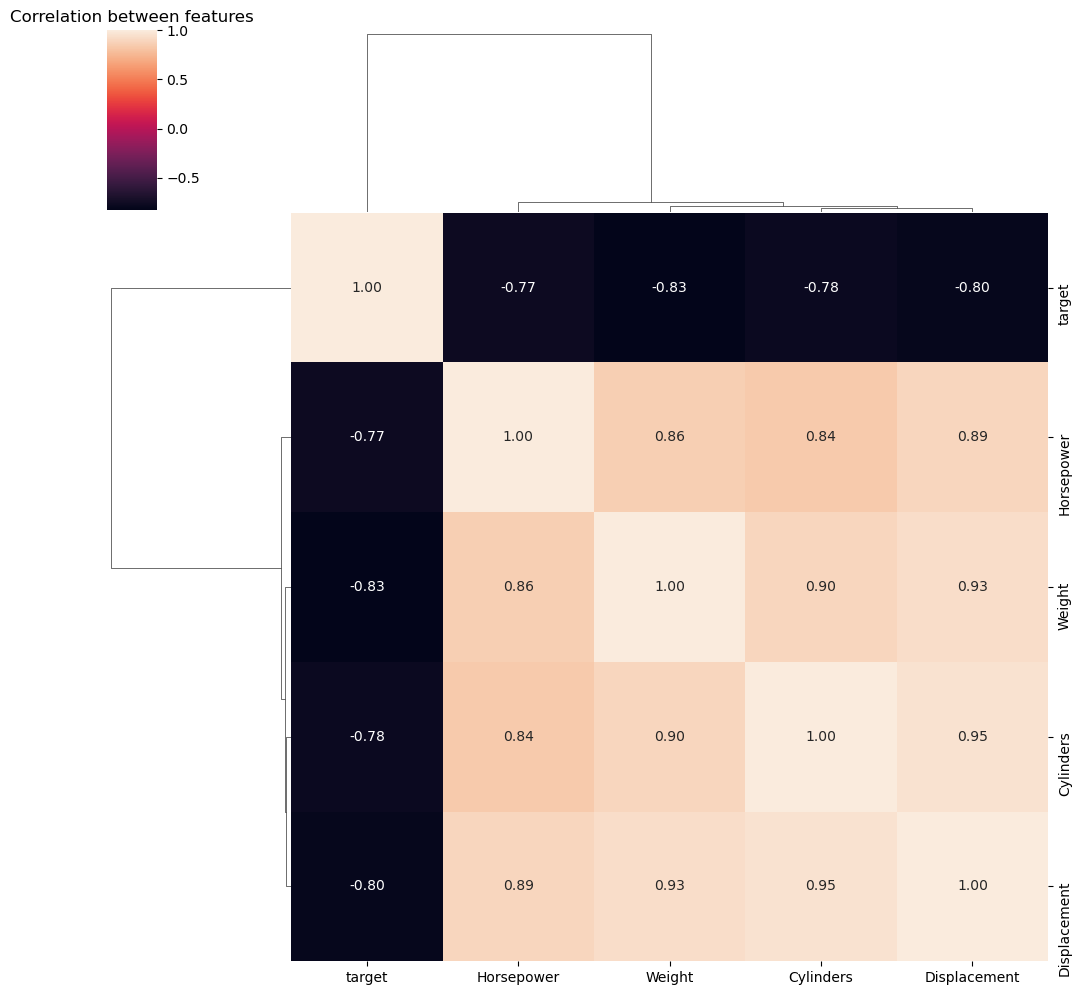

In [14]:
threshold= 0.75
filtre= np.abs(corr_matrix["target"])>threshold
corr_features= corr_matrix.columns[filtre].tolist()
#print(corr_features)
#print(data[corr_features])
#print(data[corr_features].corr())
sns.clustermap(data[corr_features].corr(), annot=True, fmt= ".2f")
plt.title("Correlation between features")
plt.show()

Multicolinearity var

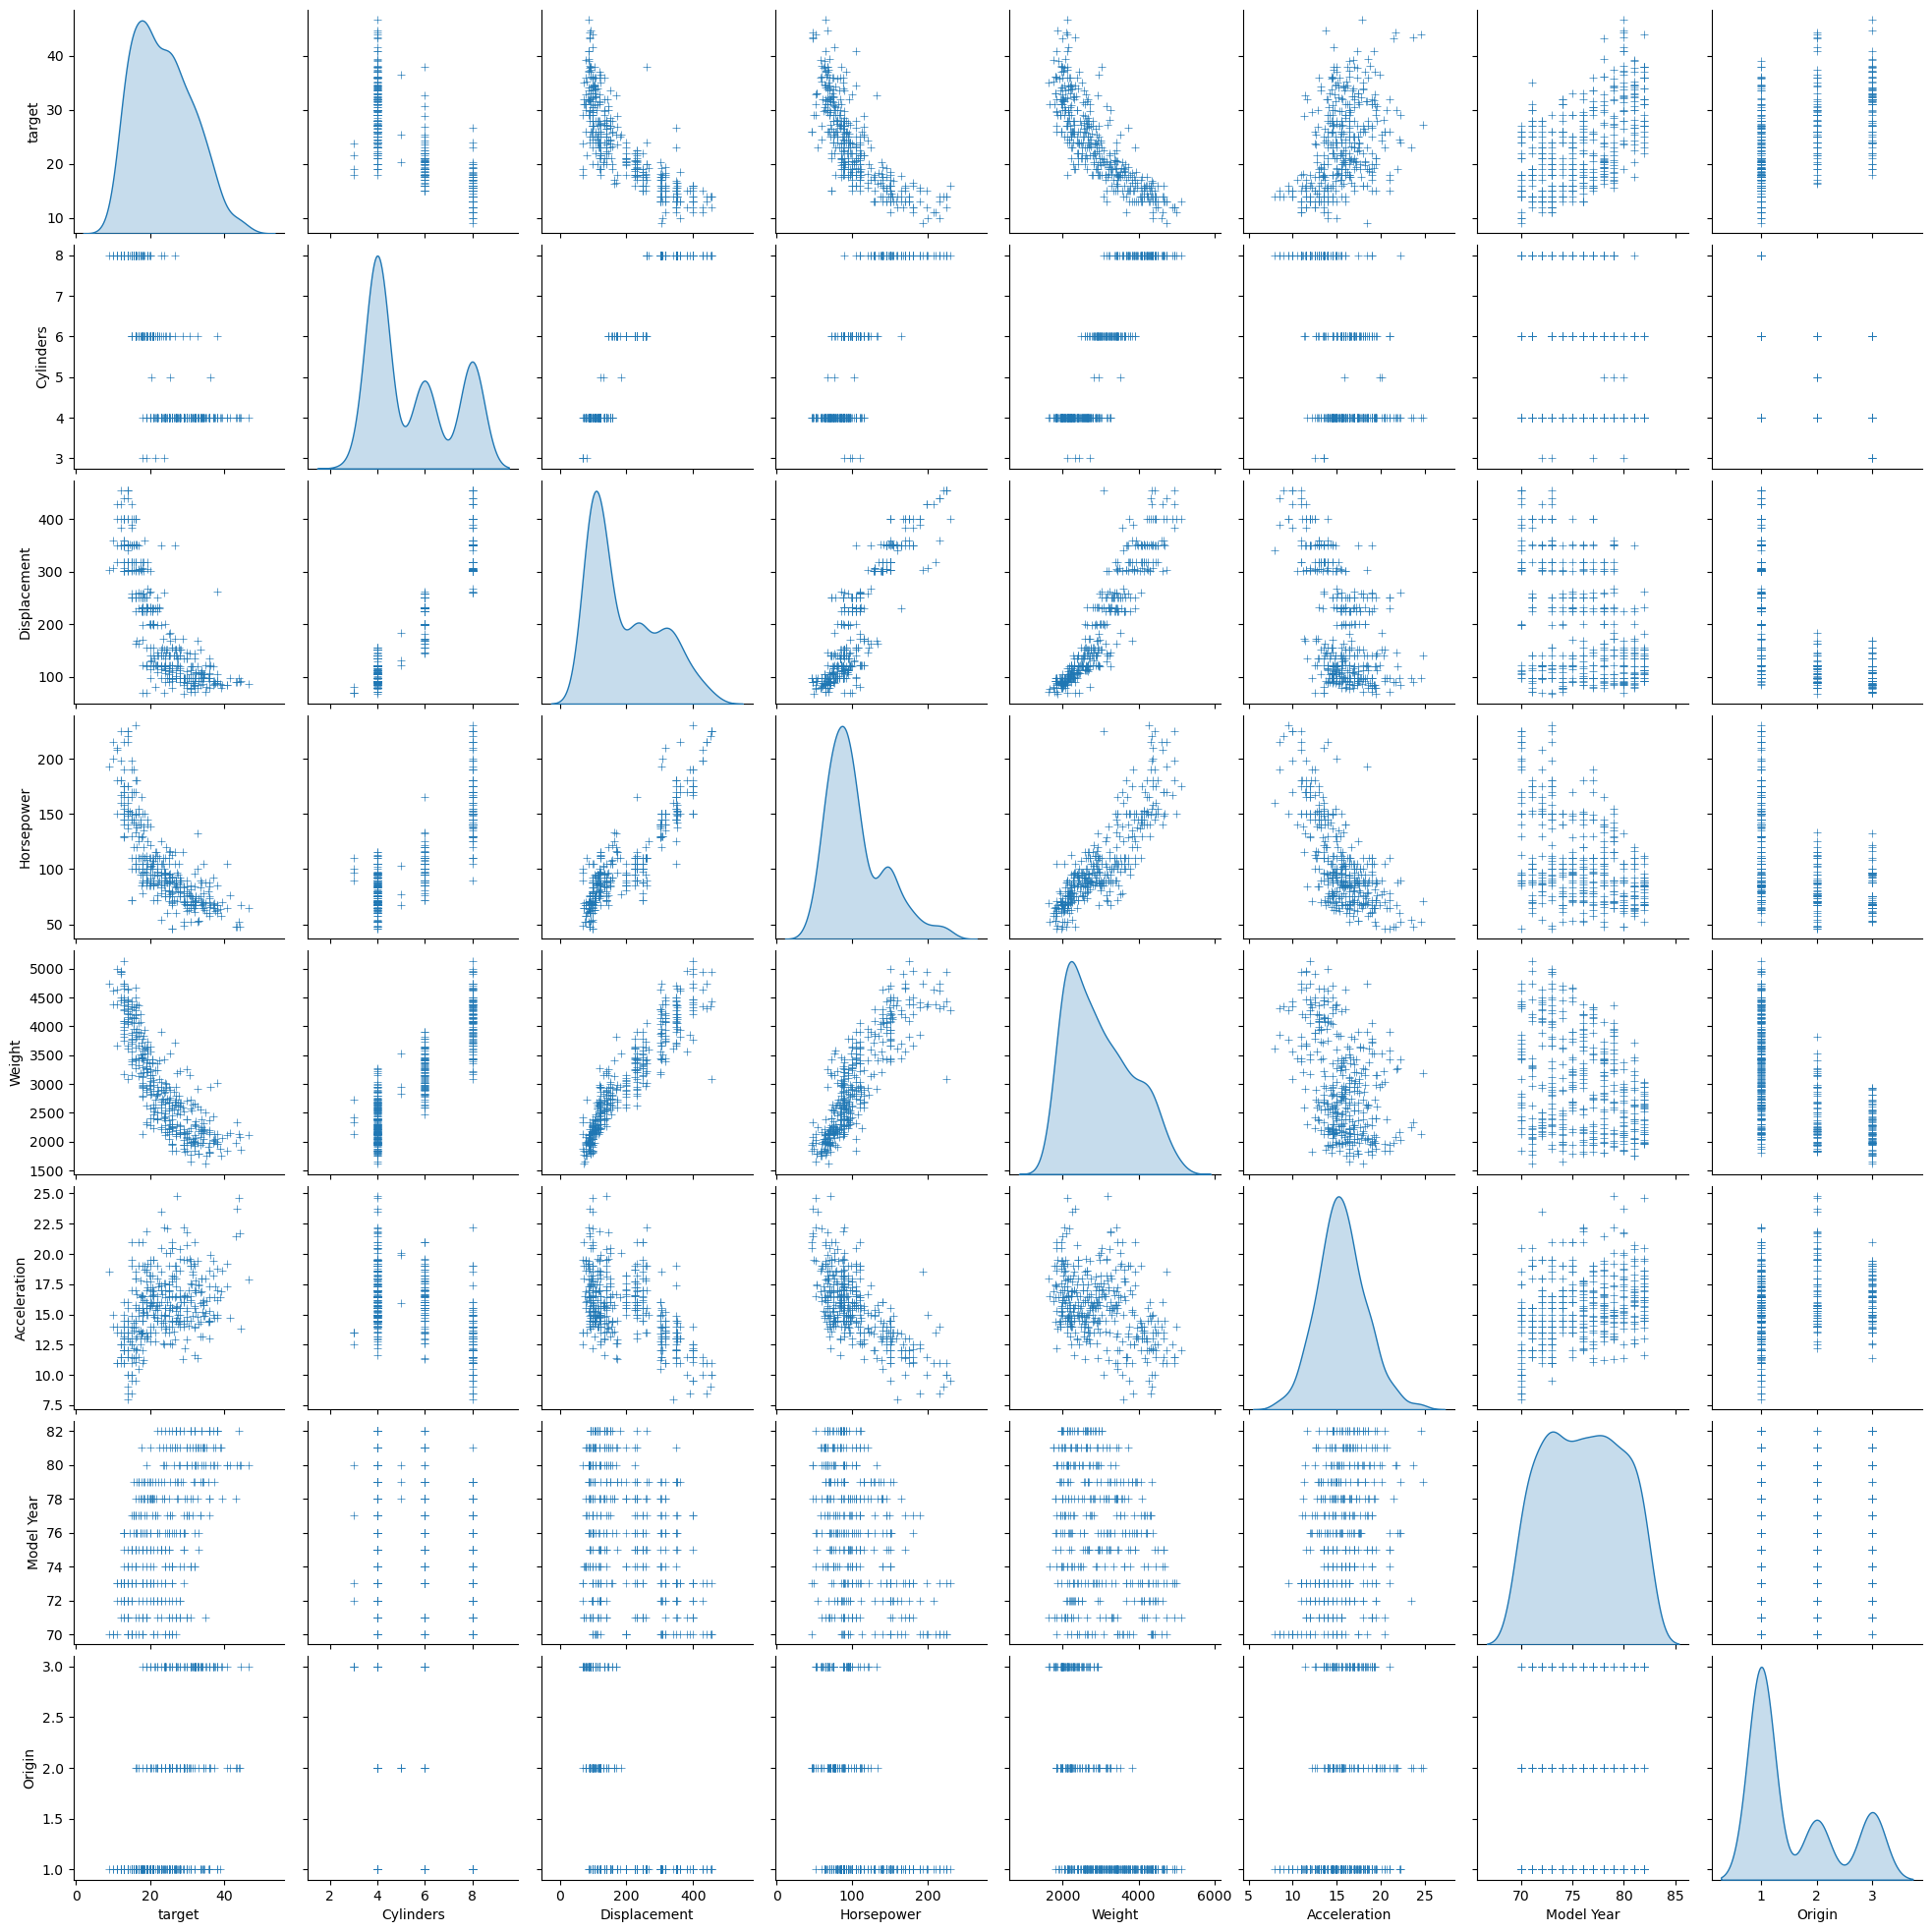

In [15]:
sns.pairplot(data, diag_kind= "kde", markers="+")
plt.show()

cylinders ve origin categorical olabilir

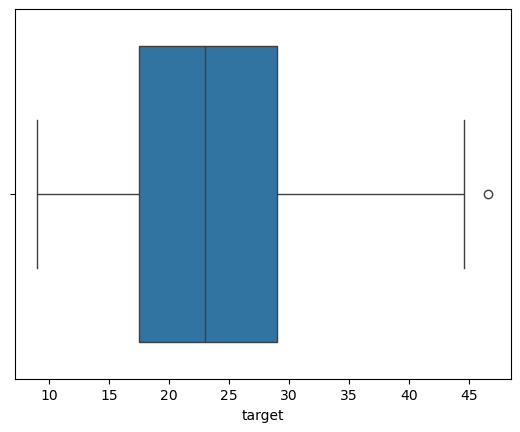

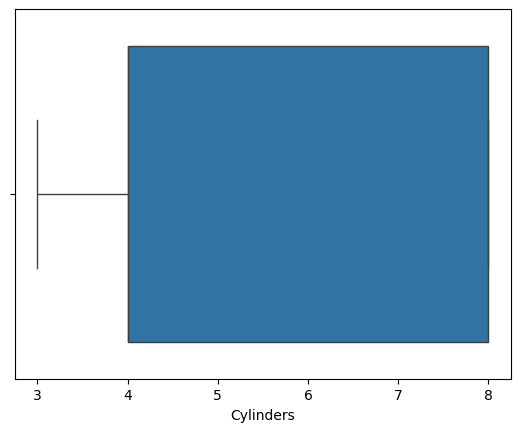

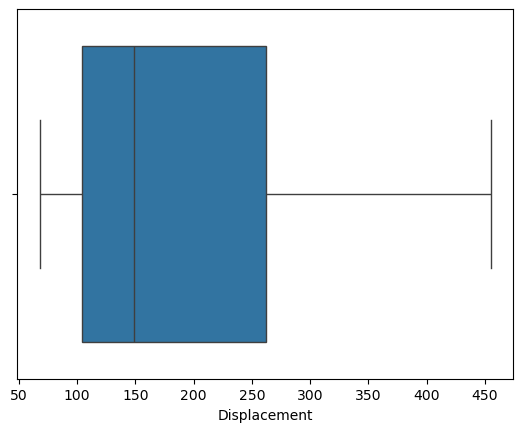

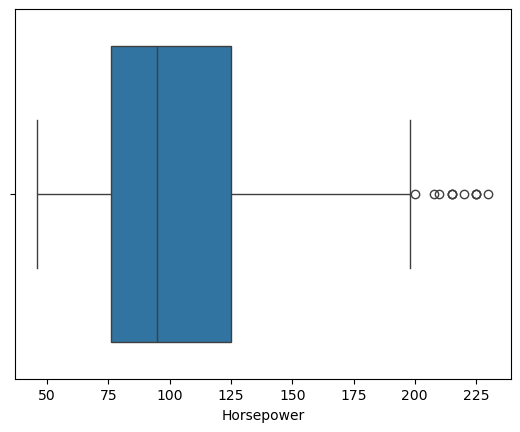

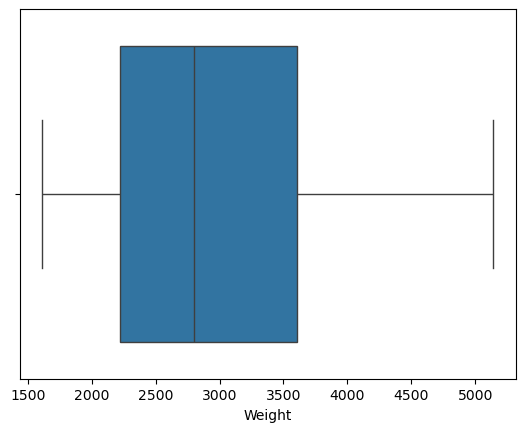

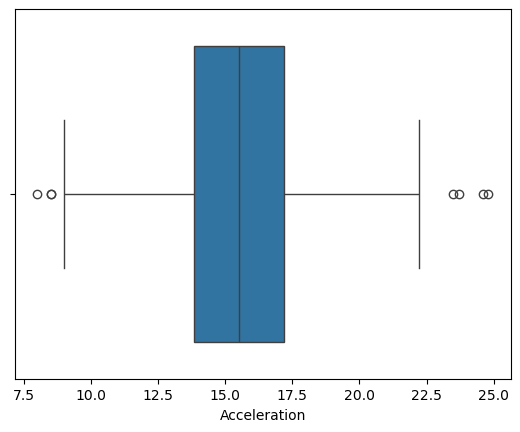

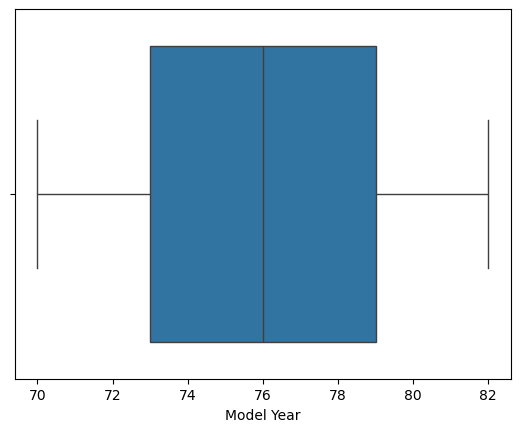

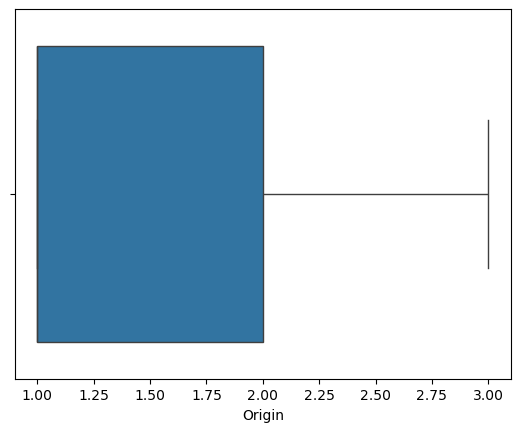

In [16]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x=c, data= data, orient="v")

outliers: horsepower and acceleration

In [17]:
len(data)

398

### Handling Outliers

![outlier](./img/outlier.png).


Görselde görüldüğü gibi belirtilen sınırların dışarısında kalan veriler outlier sayılmaktadır.

IQR= Q3-Q1


In [18]:
thr= 2
horsepower_desc= describe["Horsepower"]
horsepower_desc

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

In [19]:
q3_hp = horsepower_desc[6]  # %75
q1_hp = horsepower_desc[4]  # %25
IQR_hp= q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp

filter_hp_bottom= bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp

filter_hp= filter_hp_bottom & filter_hp_top
data= data[filter_hp] #remove horsepower outlier 

In [20]:
acceleration_desc= describe["Acceleration"]
acceleration_desc

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

In [21]:
q3_acc = acceleration_desc[6]  # %75
q1_acc = acceleration_desc[4]  # %25
IQR_acc= q3_acc - q1_acc
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc

filter_acc_bottom= bottom_limit_acc < data["Acceleration"]
filter_acc_top = data["Acceleration"] < top_limit_acc

filter_acc= filter_acc_bottom & filter_acc_top
data= data[filter_acc] #remove acceleration outlier 

In [22]:
len(data)

395

üç veri outlier olduğu için data'dan çıkarıldı

### Feature Engineering

#### Skewness

Bir dağılımın ortalaması etrafındaki asimetri derecesini belirtir.

![skewness](./img/skewness.png).

Çarpıklık sağa ya da sola doğru olabilir.

Eğer skewness> 1 ise pozitif skewness, skewness<-1 ise negatif skewness var demektir. 

Çarpıklık verinin grafik üzerinde uzanan kuyruk bölgesinde outlier olduğunu belirtebilir. Orada bulunan veriler modeli olumsuz etkileyebilir. Bu yüzden çarpıklıktan kurtulmamız ve gauss dağılımına yaklaşmamız gerekir.

<AxesSubplot:xlabel='target', ylabel='Density'>

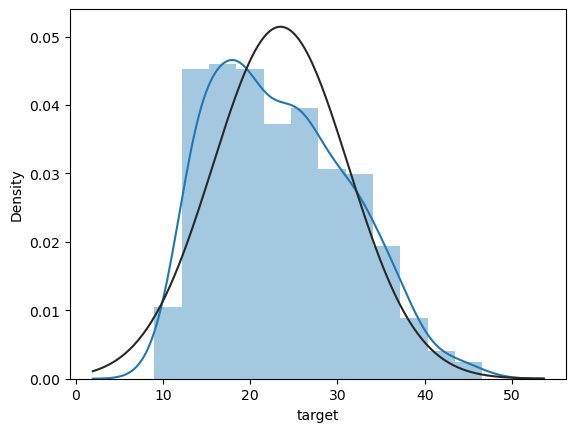

In [23]:
sns.distplot(data.target, fit= norm)

In [24]:
(mu, sigma)= norm.fit(data["target"])
print("mu: {}, sigma: {}".format(mu,sigma))

mu: 23.472405063291134, sigma: 7.756119546409932


mu: ortalama(mean), sigma: standart sapma değerlerini vermektedir.

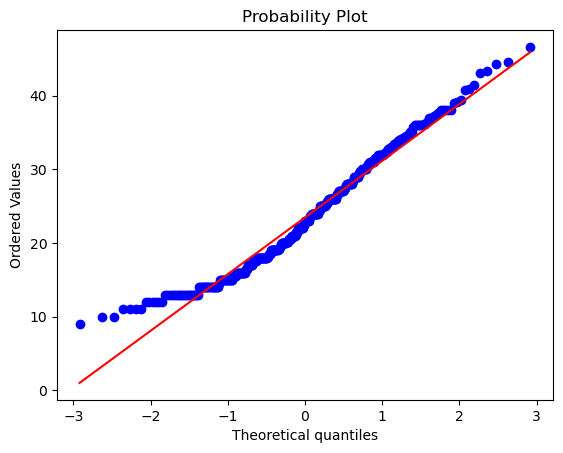

In [25]:
stats.probplot(data["target"], plot= plt)
plt.show()

burada verilerin normal dağılımdan ne kadar uzak olduğunu görebiliyoruz. Kırmızı çizgiye tam oturan bir veri olsaydı normal dağılıma sahiptir derdik.

<AxesSubplot:xlabel='target', ylabel='Density'>

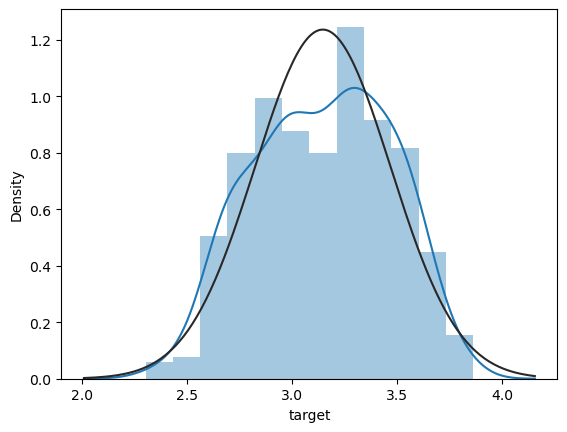

In [26]:
data["target"]= np.log1p(data["target"])
plt.figure()
sns.distplot(data.target, fit= norm)

In [27]:
(mu, sigma)= norm.fit(data["target"])
print("mu: {}, sigma: {}".format(mu,sigma))

mu: 3.146474056830183, sigma: 0.3227569103044823


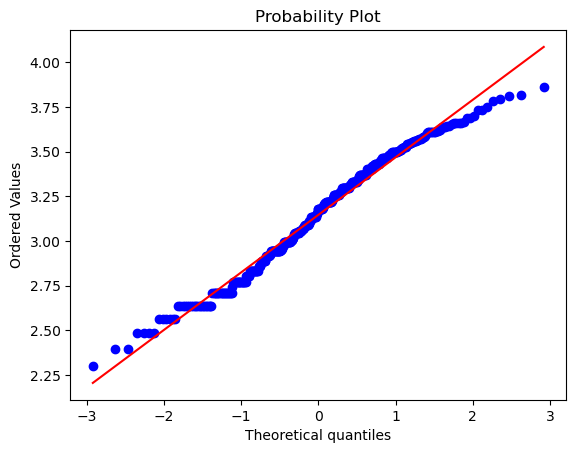

In [28]:
stats.probplot(data["target"], plot= plt)
plt.show()

Normal dağılıma sahip olmayan verileri dönüştürmek için logaritmik dönüşüm uygulanabilir burada bu yöntemi kullandık.

#### Checking Skewness for Independent Variables

In [29]:
skewed_feats= data.apply(lambda x: skew(x.dropna())).sort_values(ascending= False)
# nan değerler skewness'liği etkilediği için onları drop ettik. Azalan sırada kontrol ediyoruz
skewness= pd.DataFrame(skewed_feats, columns= ["skewed"])
skewness

,skewed
Horsepower,1.067743
Origin,0.923381
Displacement,0.714682
Weight,0.533226
Cylinders,0.523374
Acceleration,0.168986
Model Year,0.013098
target,-0.117687


Burada horsepower'da pozitif skewness'lık olduğu gözükmektedir fakat 1'e çok yakın olduğundan önemsemeyebiliriz şu an biraz daha fazla olsaydı Box Cox Transformation uygulayabilirdik.

#### One Hot Encoding

Elimizde kategorik bir veri olduğunu düşündüğümüzde 3 kategori için sırasıyla [1,0,0], [0,1,0], [0,0,1] şekilde kategori değişimi yapılır.

Bunun yapılmasının sebebi makine öğrenmesi algoritmalarında her zaman hata oranını düşürmeye çalışırız. 3 kategorili bir sınıflandırmada veri ilk kategoriye ait iken yanlış sınıflandırılıp 2. kategori sonucu alınırsa burada hata oranı 1 oluyor, aynı şekilde 3. kategori olarak sınıflanırılırsa burada hata oranı 2 oluyor. Bu durum modelin daha fazla hata oranı üretmesine sebep oluyor. Fakat bakıldığında yapılan hata aynı ve bu yüzden hata oranının artmaması gerekir. Bu yüzden de one hot encoding uygulanır.



In [30]:
data["Cylinders"]= data["Cylinders"].astype(str)
data["Origin"]= data["Origin"].astype(str)

data= pd.get_dummies(data)

In [31]:
data

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.332205,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,3.332205,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,3.496508,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


### Train-Test Split

In [32]:
x= data.drop(["target"], axis= 1)
y= data.target

In [33]:
test_size = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= test_size)

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(39, 13)
(39,)
(356, 13)
(356,)


### Standardization

In [35]:
scaler= StandardScaler()   # ya da RobustScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
# mean'ı 0, standart sapması 1 oldu.

### Linear Regression

Dependent variable (y) ile independent variable (features) arasında bir line fit etmeye yarayan yöntemdir. Bu line best fit straight line ya da regression line olarak adlandırılır. Bu line'ı bulmak için kullanılan yönteme Least Squared yöntemi denilir.

Least Squared Error'ü minimuma çekmeye çalışırız. LSE gerçek veri noktaları ile line arasında oluşan hata oranıdır.

In [36]:
lr= LinearRegression()
lr.fit(X_train, Y_train)
print("LR Coef:", lr.coef_)
y_predicted_dummy= lr.predict(X_test)
mse= mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE:", mse)

LR Coef: [-3.16584118e-02 -8.10752234e-02 -1.73324690e-01  1.54362765e-02
  1.26882842e-01  1.38777878e-17 -2.06229920e-02  0.00000000e+00
 -3.42897298e-02  6.22243614e-02 -7.21750609e-04 -8.31898615e-03
  1.41056830e-02]
Linear Regression MSE: 0.017685138351206938


### Ridge Regression

Ridge, L2 olarak da isimlendirilir. 

min(LSE + lambda*(slope^2))    

slope= b1

Bu regresyon overfitting'i önlemeye çalışır.

Ridge Coef [-0.03228102 -0.08551527 -0.16171297  0.01384859  0.12482692  0.
 -0.0166632   0.         -0.03514884  0.05810837 -0.00118007 -0.00806807
  0.01446492]
Ridge Best Estimator Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE: 0.017426621222767905
-------------------------------------------------------------


Text(0.5, 1.0, 'Ridge')

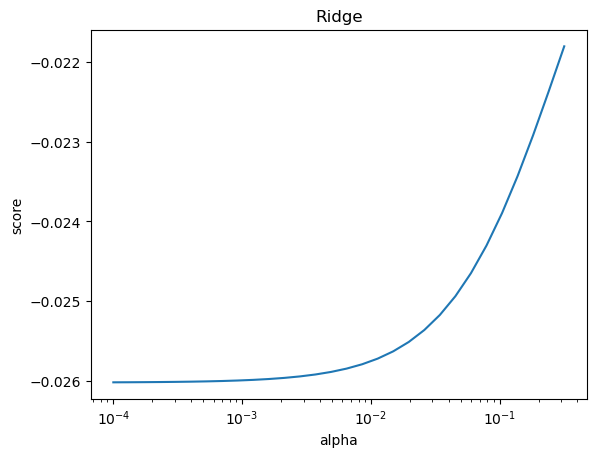

In [37]:
ridge= Ridge( random_state= 42, max_iter= 10000)
alphas= np.logspace(-4, -0.5, 30)
tuned_parameters=[{"alpha": alphas}]
n_folds= 5

clf= GridSearchCV(ridge, tuned_parameters, cv= n_folds, scoring="neg_mean_squared_error", refit= True)
# refit clf'yi daha sonra herhangi bir testte kullanabilmek için gerekli olan parametredir.
clf.fit(X_train, Y_train)
scores= clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print("Ridge Coef", clf.best_estimator_.coef_)

ridge= clf.best_estimator_
print("Ridge Best Estimator", ridge)

y_predicted_dummy = clf.predict(X_test)
mse= mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE:", mse)
print("-------------------------------------------------------------")

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

### Lasso Regression

L1 olarak da adlandırılır.

min(LSE+ lambda*|slope|)

* Ridge'den farkı, Lasso'da gereksiz feature'lara (coef'lere) 0 değeri atanır. Ridge'de ise 0 yapılmıyordu ama 0.001 şeklinde küçük değerler belirleniyordu.


* Eğer lasso'da independent variable'lardan birini 0 olarak görürsek, bunun anlamı dependent variable üzerinde bir etkisi olmayan bir fature olduğudur.


* Eğer high correlated fature'lar varsa Lasso sadece en önemlisini kullanır diğerlerine 0 atar.


* Ridge'de olduğu gibi train veri seti ile arada biraz bias oluyor ama varyans açısından daha az değerler veriyor ve overfitting'i önlüyor.

Lasso Coef [-0.         -0.08893471 -0.14905415  0.00355709  0.11888156  0.
  0.          0.         -0.03673382  0.02340412 -0.         -0.
  0.01328648]
Lasso Best Estimator Lasso(alpha=0.004893900918477494, max_iter=10000, random_state=42)
Lasso MSE: 0.014943438988898128
-------------------------------------------------------------


Text(0.5, 1.0, 'Lasso')

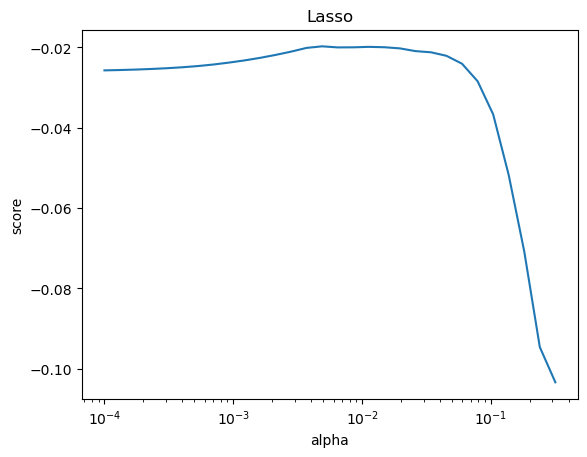

In [38]:
lasso= Lasso( random_state= 42, max_iter= 10000)
alphas= np.logspace(-4, -0.5, 30)    # hiperparametre ve seçebilmek için GridSearch Validation kullanıyoruz.

tuned_parameters=[{"alpha": alphas}]
n_folds= 5
                  #Lasso   # alpha          # 5               # Negatif MSE'ye göre değerlendirme
clf= GridSearchCV(lasso, tuned_parameters, cv= n_folds, scoring="neg_mean_squared_error", refit= True)
clf.fit(X_train, Y_train)
scores= clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print("Lasso Coef", clf.best_estimator_.coef_)

lasso= clf.best_estimator_
print("Lasso Best Estimator", lasso)

y_predicted_dummy = clf.predict(X_test)
mse= mean_squared_error(Y_test, y_predicted_dummy)
print("Lasso MSE:", mse)
print("-------------------------------------------------------------")

# alpha'nın score'a göre değişimini plot ettirelim
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

### ElasticNet

min(LSE+ lambda1* (slope)^2 + lambda2* |slope|)

* Hem Lasso hem de Ridge'de yapılan işlemleri birleştirmiş. İki regülarization tekniğinin güçlü yönlerine sahiptir.


* Yüksek korelasyona sahip variable'larda çok işe yarayan bir tekniktir. Korelasyonları azaltmada ve korrelated feature'ların (küçültme, çıkarma, azaltma)shrink edilmesinde kullanılır.

In [39]:
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

eNet= ElasticNet(random_state= 42, max_iter= 10000)
clf= GridSearchCV(eNet, parametersGrid, cv= n_folds, scoring="neg_mean_squared_error", refit= True)
clf.fit(X_train, Y_train)

print("ElacticNet Coef", clf.best_estimator_.coef_)

print("ElasticNet Best Estimator", clf.best_estimator_)

y_predicted_dummy = clf.predict(X_test)
mse= mean_squared_error(Y_test, y_predicted_dummy)
print("ElasticNet MSE:", mse)

ElacticNet Coef [-0.         -0.09033877 -0.12194882  0.00131524  0.10844945  0.
  0.          0.         -0.04522872  0.         -0.          0.
  0.01180596]
ElasticNet Best Estimator ElasticNet(alpha=0.05968456995122311, l1_ratio=0.15000000000000002,
           max_iter=10000, random_state=42)
ElasticNet MSE: 0.014921540701453842


### MSE results after StandardScaler

* Linear Regression MSE: 0.017685138351206938
* Ridge MSE: 0.017426621222767905
* Lasso MSE: 0.014943438988898128
* ElasticNet MSE: 0.014921540701453842

### MSE results after RobustScaler

* Linear Regression MSE: 0.017630022494038125
* Ridge MSE: 0.018002442095724498
* Lasso MSE: 0.017987558641844908
* ElasticNet MSE: 0.017784908358226978

### XGBoost

In [40]:
model_xgb= xgb.XGBRegressor(objective= 'reg:linear', max_depth= 5, min_child_weight=4, subsample= 0.7, n_estimators= 1000, learning_rate= 0.07)
model_xgb.fit(X_train, Y_train)
y_predicted_dummy= model_xgb.predict(X_test)
mse= mean_squared_error(Y_test, y_predicted_dummy)
print("XGBRegressor MSE:", mse)

XGBRegressor MSE: 0.01627547317276996


Burada alınan sonuç biraz tatmin edici değil o yüzden parametre ayarlaması yapalım.

In [42]:
parametersGrid= {"nthread":[4],
                "objective":['reg:linear'],
                "learning_rate": [.03, 0.05, .07],
                "max_depth": [5,6,7],
                "min_child_weight": [4],
                "silent": [1],
                "subsample": [0.7],
                "colsample_bytree":[0.7],
                "n_estimators": [500,1000]}

model_xgb= xgb.XGBRegressor()

clf= GridSearchCV(model_xgb, parametersGrid, cv= n_folds, scoring="neg_mean_squared_error", refit= True)
clf.fit(X_train, Y_train)

y_predicted_dummy= clf.predict(X_test)
mse= mean_squared_error(Y_test, y_predicted_dummy)
print("XGBRegressor MSE:", mse)

XGBRegressor MSE: 0.015204700515604278


Burada biraz daha iyi bir sonuç elde ettik